# AP Test Data Analysis
A recent [*New York Times* article](https://www.nytimes.com/2023/11/18/us/college-board-ap-exams-courses.html?unlocked_article_code=1.8U4.N10I._gyFbDxOJ9aL&smid=url-share) pointed out that while many charter school networks embrace an AP Curriculum, students often test poorly on the culminating exam, with 60% or more students earning a 1 or 2.    

While this same trend is seen in this data set (60% of students scored a 1 or 2), this analysis seeks to indentify other factors influencing AP results.  The three factors examined include: the **quality of the curriculum**, the **teacher's expertise**, and the **student's preparedness** for college level work. 

By comparing the network's exam results to national data provided by the College Board, these recommendations can be made:  
- On **Curriculum**: 
    - The majority of students in **AP Computer Science A**, **AP English Language and Composition**, and **AP English Literature and Composition** score above the national average on the respective exams.  These curriculums may be particularly strong, and examining them for key qualities may be beneficial.  
    - The majority of students in **AP Environment Science** score more than 1 standard deviation below the national average.  This curriculum may be relatively new and in need of additional work.  
- On **Teacher Preparation**:  
    - Within the same course, there can be a wide variation in student performance by teacher.  Some teachers may be highly experienced, while others may arrive midyear and are still becoming familiar with the curriculum.  Learning from the highly experienced teachers and supporting newer teachers may help.  
- On **Student Preparation**:
    - After accounting the factors listed above, student preparation still has a large affect on outcome.  A student who has been selected for one or more AP courses does substantionally better than students who are placed in the AP class regardless of preparation.




## AP Student Results
After loading AP results from the network and national level, we compare student results by subject test. 
- Students in **Computer Science A**, **English Literature**, and **English Language** score **above** the national average in the respective subjects.  These curriculums and teachers may be particularly strong, and may merit follow up.
- Students in **Environmental Science** score **further below** the national average, indicating the curriculum may need improvement.



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

df_usi_scores = pd.read_csv("Data/ia_results.csv")
df_usi_Teacher = pd.read_csv("Data/teachers.csv")
df_usi_Student_Roster = pd.read_csv("Data/student_roster.csv")

df_usi_Teacher.columns = ["Subject", "School", "Teacher"]
df_usi_Teacher
df_usi_Student_Roster.columns = ["Student_Number", "School"]
df_usi_scores.drop_duplicates(inplace=True)

df = pd.merge(left=df_usi_scores, right=df_usi_Student_Roster, left_on="Student_Number", right_on="Student_Number")
df = pd.merge(left=df, right=df_usi_Teacher, left_on=["School", "Subject"], right_on=["School", "Subject"])

In [49]:
df_cb = pd.read_excel("Data/ap-score-distributions-by-subject-2024.xlsx", header=2, nrows=11)
df_cb = df_cb.drop([0,1,7,8], axis=0).set_index("Exam Score")
df_cb = df_cb[["AP Seminar", "Physics", "AP Chemistry", "English III", "AP English Language", "Honors US History"]]

temp = pd.read_excel("Data/ap-score-distributions-by-subject-2024.xlsx", header=14, nrows=11)
temp.drop([0,1,7,8], inplace=True)
temp.set_index("Exam Score", inplace=True)
df_cb = pd.concat([df_cb, temp[["AP US History"]]], axis=1)

In [50]:
df_cb

,AP Seminar,Physics,AP Chemistry,English III,AP English Language,Honors US History,AP US History
Exam Score,,,,,,,
5,16725,4359,9856,17464,47767,61321,4464
4,29405,4105,6044,16444,44036,73921,9208
3,31652,7613,4127,12822,47678,62384,16863
2,42981,5214,4856,8098,26836,37826,4071
1,43718,1513,3084,6424,18077,84712,863
Mean Score,80,80,80,80,80,80,80
Standard Deviation,5,5,5,5,5,5,5


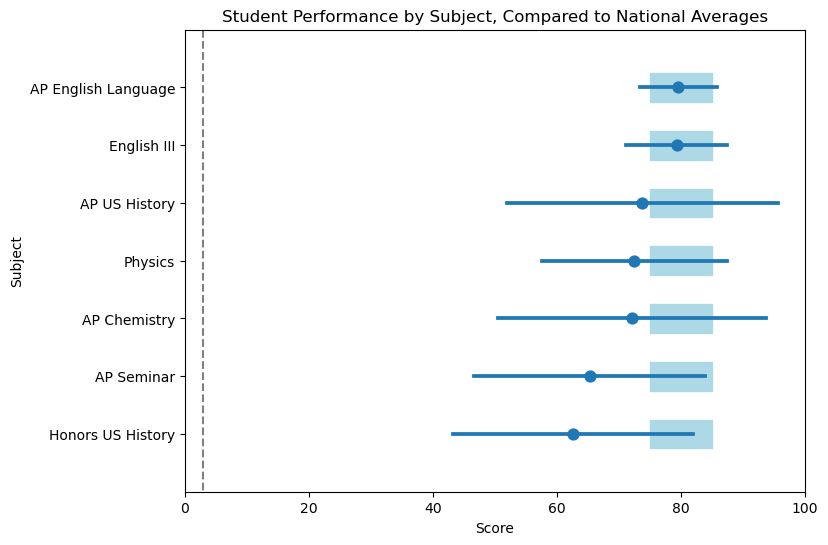

In [57]:
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

fig, ax = plt.subplots(figsize=[8,6])
df_ave = df[["Subject", "Score"]].groupby("Subject").mean()
order = df_ave.sort_values(ascending=False, by="Score").index

sns.pointplot(df, x="Score", y="Subject", linestyles="none", order=order, ax=ax, errorbar='sd')

y_labels = ax.yaxis.get_ticklabels()

for label in y_labels:
    national_ave = df_cb.loc["Mean Score", label.get_text()]
    national_std = df_cb.loc["Standard Deviation", label.get_text()]
    position = label.get_position()
    rect = patches.Rectangle((national_ave-national_std, position[1]-0.25), 
                             2*national_std, 0.5, facecolor='#ADD8E6', edgecolor='#ADD8E6')
    ax.add_patch(rect)

ax.set_xlim((0,100))
ax.set_ylim((7,-1))
#ax.set_xticklabels(["",1,2,3,4,5,""]);
ax.vlines(x=3, ymin=-1, ymax=11, colors="gray", linestyles='dashed')
ax.set_title("Student Performance by Subject, Compared to National Averages");

file = "Images/key.jpg"
key = image.imread(file)

#imagebox = OffsetImage(key, zoom = 0.15)
#ab = AnnotationBbox(imagebox, (6,1.5), frameon=True)
#ax.add_artist(ab)


### The Effect of a Teacher
To remove the potential affects of strong or developing curriculum, we look at student performance with respect to teacher assignment.  
In some AP Calculus, U.S. History, and Biology, we see a correlation between teacher assignment and student performance.

/Users/jgoett/anaconda3/envs/jeff-env/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


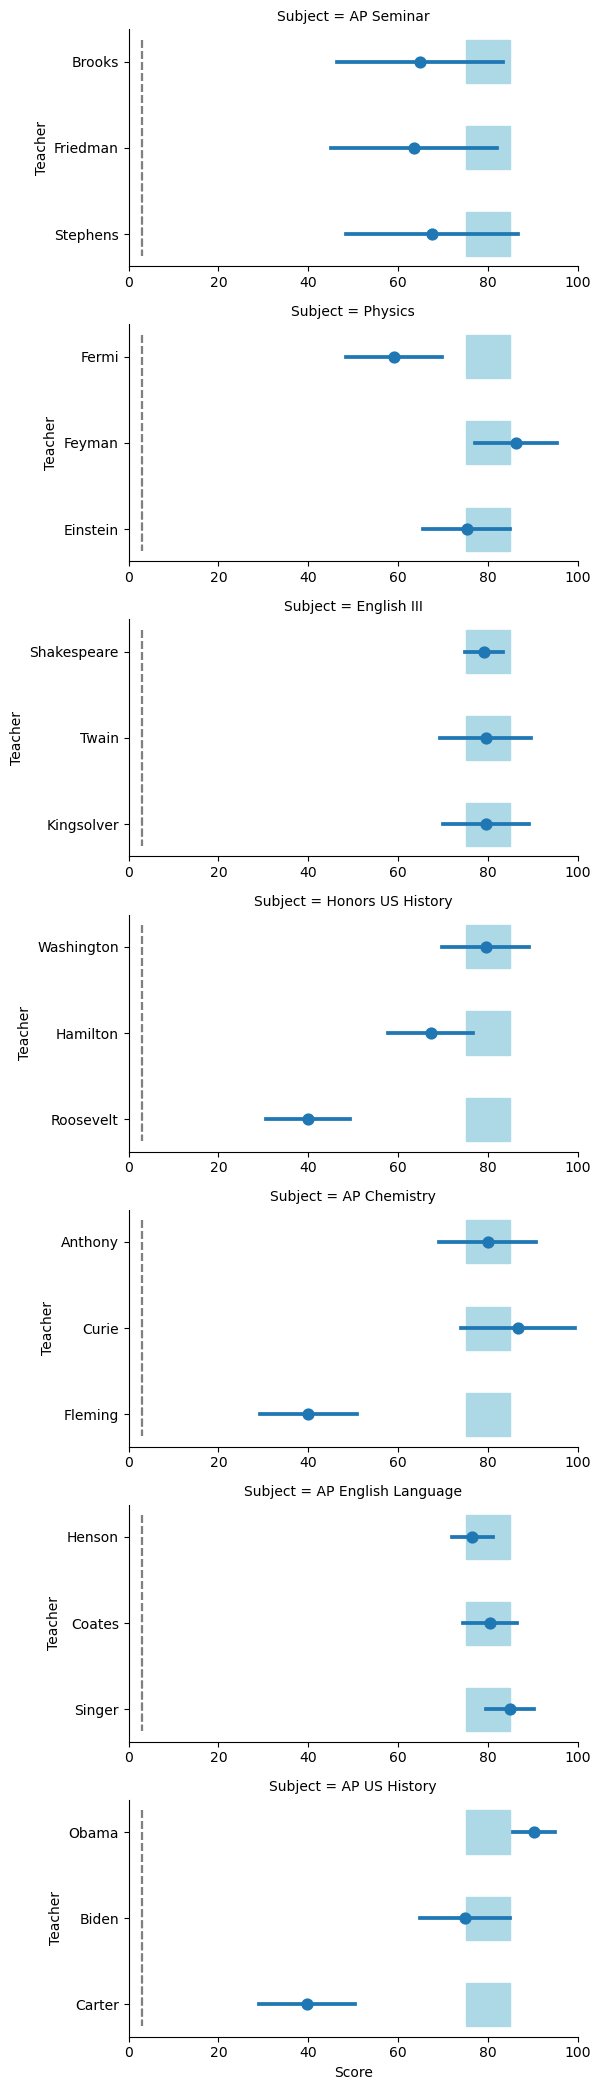

In [59]:
df_sub = df[~df.Subject.isin(["Environmental Science", "Computer Science A", "English Language & Comp", "English Literature & Comp", "Government & Politics - U.S.", "Chemistry"])]


order = df_sub[["Subject", "Score"]].groupby(by="Subject").mean()
order = order.sort_values(by="Score", ascending=False)
order = order.index

df_sub.loc[:,"Subject"] = pd.Categorical(df_sub["Subject"], categories=order, ordered=True)

g = sns.FacetGrid(df_sub, col="Subject", col_wrap=1, sharey=False, aspect=2, sharex=False, 
                  legend_out=False)
g.map(sns.pointplot, "Score", "Teacher", linestyles="none", errorbar='sd')

g.set(xlim=(0,100))

ax = g.axes[0]
#ax.set_xticklabels(["",1,2,3,4,5,""])

for ax, Subject in list(zip(g.axes, list(order))):
  labels = ax.yaxis.get_ticklabels()
  for label in labels:
    national_ave = df_cb.loc["Mean Score", Subject]
    national_std = df_cb.loc["Standard Deviation", Subject]
    position = label.get_position()
    rect = patches.Rectangle((national_ave-national_std, position[1]-0.25), 
                             2*national_std, 0.5, facecolor='#ADD8E6', edgecolor='#ADD8E6')
    ax.add_patch(rect)
    ax.vlines(x=3, ymin=-0.25, ymax=len(labels)-0.75, color="gray", linestyles='dashed')




## Consider Student Preparation


Finally, we consider the roll of student preparation.  A student is considered highly prepared if they have been selected or "tracked" into an AP course that is not "AP for All."
A student is considered "AP for All" if they are only enrolled in "AP for All" classes.

We see that tracked students perform better on AP tests than "AP for All" students.

In [60]:
tracked_courses = ["AP English Language", "AP Chemistry", "AP US History"]

tracked_students = df.loc[df.Subject.isin(tracked_courses), "Student_Number"]
tracked_students = tracked_students.unique()

df["Tracked_Student"] = df["Student_Number"].apply(lambda x: "Tracked" if x in tracked_students else "AP for All")

/var/folders/ym/68nrz1n97wj0gz5413bhpqs80000gn/T/ipykernel_10812/1319794813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub2["Subject2"] = pd.Categorical(df_sub2["Subject"], categories=order, ordered=True)
/Users/jgoett/anaconda3/envs/jeff-env/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


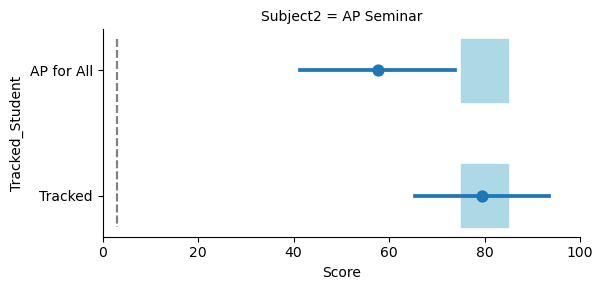

In [61]:
focus_classes = ["AP Seminar"]
df_sub2 = df.loc[df.Subject.isin(focus_classes)]

order = df_sub2[["Subject", "Score"]].groupby(by="Subject").mean()
order = order.sort_values(by="Score", ascending=False)
order = order[~order.Score.isna()]
order = order.index

df_sub2["Subject2"] = pd.Categorical(df_sub2["Subject"], categories=order, ordered=True)

g = sns.FacetGrid(df_sub2, col="Subject2", col_wrap=1, sharey=False, aspect=2, sharex=False, 
                  legend_out=False)
g.map(sns.pointplot, "Score", "Tracked_Student", linestyles="none", errorbar='sd')

g.set(xlim=(0,100))


for ax, Subject in list(zip(g.axes, list(order))):
  labels = ax.yaxis.get_ticklabels()
  for label in labels:
    national_ave = df_cb.loc["Mean Score", Subject]
    national_std = df_cb.loc["Standard Deviation", Subject]
    position = label.get_position()
    rect = patches.Rectangle((national_ave-national_std, position[1]-0.25), 
                             2*national_std, 0.5, facecolor='#ADD8E6', edgecolor='#ADD8E6')
    ax.add_patch(rect)
    ax.vlines(x=3, ymin=-0.25, ymax=len(labels)-0.75, color="gray", linestyles='dashed')

## Conclusion
In summary, we see that student performance in AP classes is highly dependent on **curriculum**, **teacher assignment**, and **student preparation**.  Student performance can be improved, then by addressing each issue appropriately.